In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92,45.0,27.0,31.0,0.0
1,85.0,64,59.0,32.0,23.0,0.0
2,86.0,54,33.0,16.0,54.0,0.0
3,91.0,78,34.0,24.0,36.0,0.0
4,98.0,55,NaN,NaN,17.0,NaN
...,...,...,...,...,...,...
340,NaN,54,NaN,22.0,NaN,4.0
341,89.0,48,32.0,22.0,14.0,4.0
342,85.0,52,22.0,23.0,34.0,4.0
343,95.0,93,NaN,27.0,NaN,NaN


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	11
int64		column 2	0
float64		column 3	67
float64		column 4	45
float64		column 5	22
float64		column 6	56


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,334.000000,345.000000,278.000000,300.000000,323.000000,289.000000
mean,90.176647,69.869565,29.971223,24.513333,38.130031,3.420415
std,4.478369,18.347670,17.614378,9.143404,39.797958,3.292283
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,24.000000,2.000000
75%,93.000000,80.000000,33.000000,27.000000,43.500000,6.000000
max,103.000000,138.000000,155.000000,78.000000,297.000000,20.000000


<AxesSubplot:>

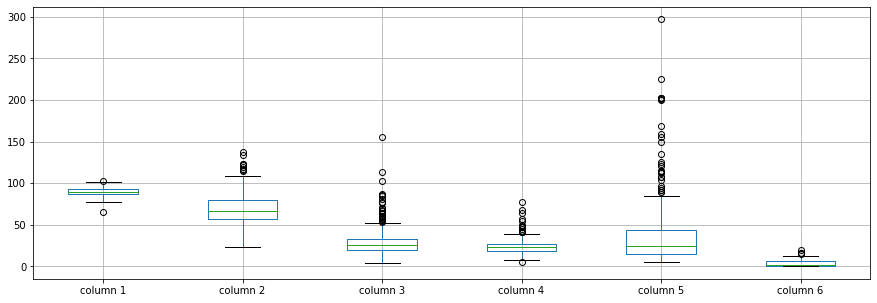

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1    90.176647
column 2    69.869565
column 3    29.971223
column 4    24.513333
column 5    38.130031
column 6     3.420415
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.032874,0.114889,0.164139,0.222294,0.328890
column 2,0.032874,1.000000,0.046044,0.165534,0.131078,0.021562
column 3,0.114889,0.046044,1.000000,0.676358,0.462205,0.230579
column 4,0.164139,0.165534,0.676358,1.000000,0.512247,0.292676
column 5,0.222294,0.131078,0.462205,0.512247,1.000000,0.353744
column 6,0.328890,0.021562,0.230579,0.292676,0.353744,1.000000


In [10]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+77,6+77+77,6+77+77+77,6+77+77+77+77,6+77+77+77,6+77+77,6+77,6], vae_layer = False, seed = 770)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 262.73582458496094
Epoch: 1 , loss: 262.2922857375372
Epoch: 2 , loss: 262.4147055489676
Epoch: 3 , loss: 262.51186915806363
Epoch: 4 , loss: 263.371581304641
Epoch: 5 , loss: 261.4369354248047
Epoch: 6 , loss: 261.22255452473956
Epoch: 7 , loss: 260.0417182559059
Epoch: 8 , loss: 260.97149658203125
Epoch: 9 , loss: 261.8801509312221
Epoch: 10 , loss: 255.15940929594495
Epoch: 11 , loss: 254.82479567754837
Epoch: 12 , loss: 246.7123536609468
Epoch: 13 , loss: 233.48972938174293
Epoch: 14 , loss: 223.83097403390067
Epoch: 15 , loss: 223.04896400088356
Epoch: 16 , loss: 220.23448544456846
Epoch: 17 , loss: 216.10724167596726
Epoch: 18 , loss: 210.2555200485956
Epoch: 19 , loss: 209.29136657714844
Epoch: 20 , loss: 208.17382013230096
Epoch: 21 , loss: 204.8301079159691
Epoch: 22 , loss: 202.34187534877233
Epoch: 23 , loss: 199.43338811965216
Epoch: 24 , loss: 199.14397466750373
Epoch: 25 , loss: 190.717516

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,0,0.000000,0.00000,0.000000,0.000000
1,0.000000,0,0.000000,0.00000,0.000000,0.000000
2,0.000000,0,0.000000,0.00000,0.000000,0.000000
3,0.000000,0,0.000000,0.00000,0.000000,0.000000
4,0.000000,0,-7.131010,-11.85297,0.000000,0.766887
...,...,...,...,...,...,...
340,-62.976776,0,-11.697661,0.00000,-20.602864,0.000000
341,0.000000,0,0.000000,0.00000,0.000000,0.000000
342,0.000000,0,0.000000,0.00000,0.000000,0.000000
343,0.000000,0,-15.081586,0.00000,-40.533648,-5.225294


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

430.5182678964951

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [20]:
NRMS=numerator/denominator
NRMS


0.17085671273206668

In [19]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92,45,27.0,31.0,0.0
1,85,64,59,32.0,23.0,0.0
2,86,54,33,16.0,54.0,0.0
3,91,78,34,24.0,36.0,0.0
4,98,55,13,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54,25,22.0,35.0,4.0
341,89,48,32,22.0,14.0,4.0
342,85,52,22,23.0,34.0,4.0
343,95,93,21,27.0,47.0,6.0


In [21]:
imputations[-1].to_excel("Bupa_AG_10(imp).xlsx", index=False, header=False)